In [7]:
import pandas as pd

df= pd.read_csv('Data/baltimore_crime_counts_2023.csv')
df

,CrimeDateTime,LARCENY,RAPE,AGG. ASSAULT,LARCENY FROM AUTO,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
0,2011-01-01 00:00:00+00:00,39,5,28,27,21,41,15,5,2,1.0,NaN,NaN,NaN
1,2011-01-02 00:00:00+00:00,20,2,6,20,19,14,5,10,1,0.0,NaN,NaN,NaN
2,2011-01-03 00:00:00+00:00,19,1,13,16,21,15,7,9,1,0.0,NaN,NaN,NaN
3,2011-01-04 00:00:00+00:00,29,1,11,12,12,29,10,4,0,0.0,NaN,NaN,NaN
4,2011-01-05 00:00:00+00:00,30,0,9,14,28,26,10,6,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2024-01-27 00:00:00+00:00,15,1,11,10,6,21,24,17,3,NaN,4.0,0.0,2.0
4775,2024-01-28 00:00:00+00:00,23,0,12,5,7,41,18,10,1,NaN,1.0,0.0,0.0
4776,2024-01-29 00:00:00+00:00,23,1,14,11,5,25,28,7,1,NaN,2.0,0.0,1.0
4777,2024-01-30 00:00:00+00:00,22,1,13,8,9,25,29,9,0,NaN,4.0,2.0,1.0


In [8]:
crimes = ['LARCENY','LARCENY FROM AUTO', 'AUTO THEFT','SHOOTING','ROBBERY - CARJACKING']
crimes_ts = df[crimes].copy()
crimes_ts.head()

,LARCENY,LARCENY FROM AUTO,AUTO THEFT,SHOOTING,ROBBERY - CARJACKING
0,39,27,15,NaN,NaN
1,20,20,5,NaN,NaN
2,19,16,7,NaN,NaN
3,29,12,10,NaN,NaN
4,30,14,10,NaN,NaN


In [9]:
crimes_ts.isna().sum()

LARCENY                   0
LARCENY FROM AUTO         0
AUTO THEFT                0
SHOOTING                385
ROBBERY - CARJACKING      8
dtype: int64

In [10]:
## fill null values with 0
crimes_ts = crimes_ts.fillna(0)
crimes_ts

,LARCENY,LARCENY FROM AUTO,AUTO THEFT,SHOOTING,ROBBERY - CARJACKING
0,39,27,15,0.0,0.0
1,20,20,5,0.0,0.0
2,19,16,7,0.0,0.0
3,29,12,10,0.0,0.0
4,30,14,10,0.0,0.0
...,...,...,...,...,...
4774,15,10,24,2.0,4.0
4775,23,5,18,0.0,1.0
4776,23,11,28,1.0,2.0
4777,22,8,29,1.0,4.0


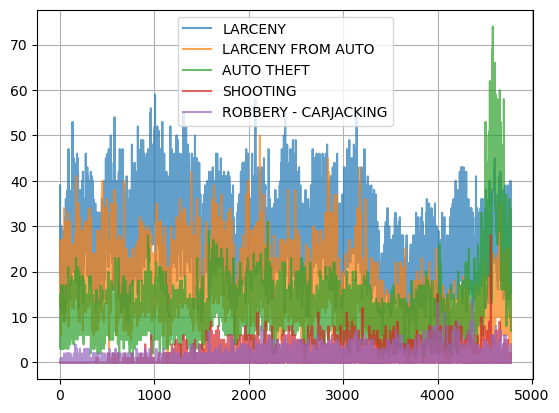

In [11]:
crimes_ts.plot(grid=True,alpha=0.7);

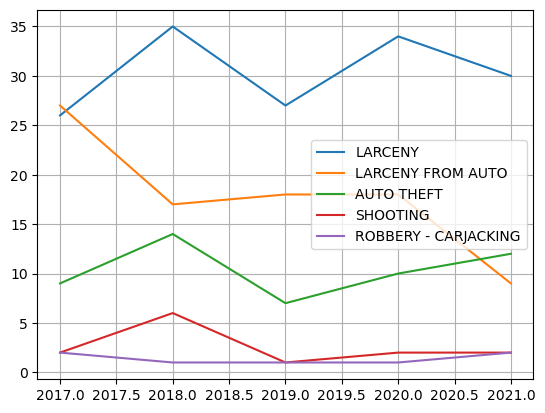

In [12]:
# IDENTIFYING SEASONALITY

plot_df = crimes_ts.loc['2017':'2021']
plot_df.plot(grid=True);

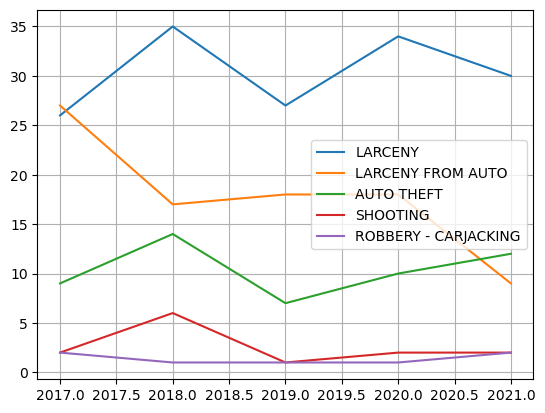

In [13]:
plot_df = crimes_ts.loc['2017':'2021']
plot_df.plot(grid=True);

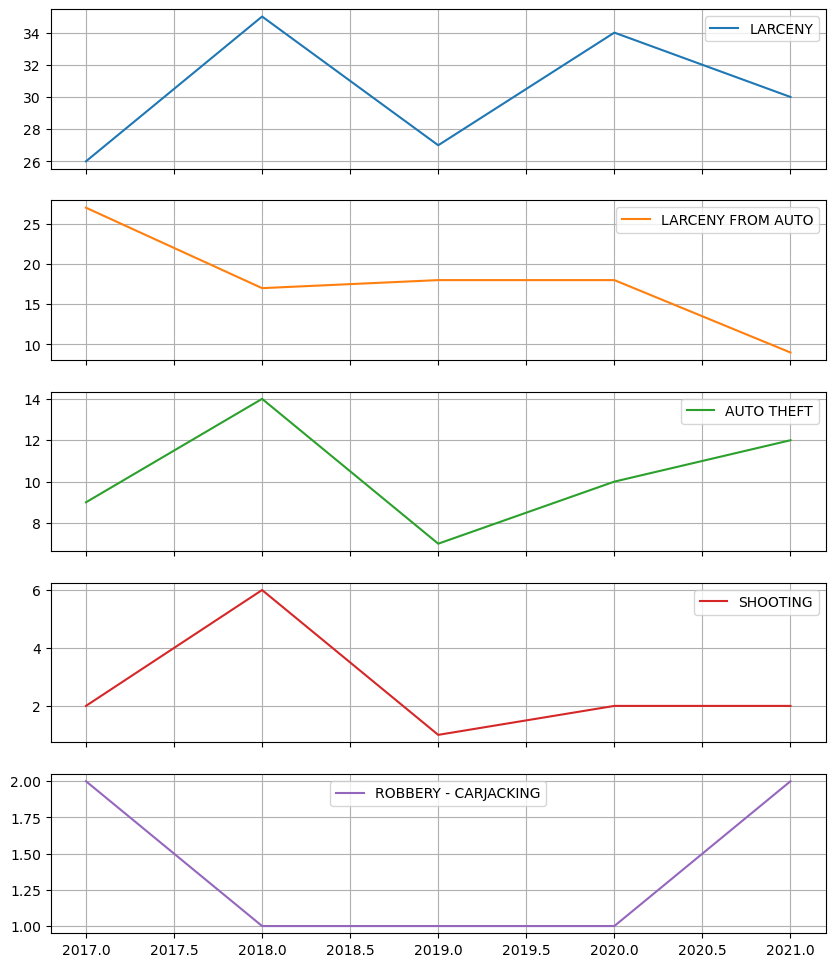

In [14]:
plot_df.plot(subplots=True,figsize=(10,12),grid=True);

In [15]:
plot_df_W = crimes_ts.loc['2017':'2021'].resample('W').sum()
plot_df_W.plot(grid=True,subplots=True,figsize=(10,15));

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [16]:
plot_df_W.rolling(4).mean().dropna().plot(subplots=True,figsize=(10,12));

NameError: name 'plot_df_W' is not defined

In [17]:
# SEASONAL DECOMPOSITION

# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from '/Users/sofiawang/anaconda3/envs/dojo-env/lib/python3.10/site-packages/statsmodels/tsa/api.py'>

In [19]:
crime_type = "LARCENY FROM AUTO"
ts = plot_df_W[crime_type]
ts.plot(title=crime_type)

NameError: name 'plot_df_W' is not defined

In [ ]:
decomp = tsa.seasonal_decompose(ts)
decomp

In [20]:
# VISUALIZING DECOMP RESULTS

fig = decomp.plot()

NameError: name 'decomp' is not defined

In [ ]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [ ]:
decomp.trend

In [ ]:
decomp.trend.plot(title='Trend');

In [ ]:
decomp.seasonal.head()

In [ ]:
decomp.seasonal.plot(title='Seasonal');

In [ ]:
decomp.resid.head()

In [ ]:
decomp.resid.plot(title='Residual');

In [ ]:
# Adding decomposition components together
ts_model = decomp.trend + decomp.seasonal + decomp.resid
# Visualize the result
ax = ts_model.plot(label='Recombined from Decomposition')
ax.legend()

In [ ]:
ax = ts.plot(label='Original, Raw')
ts_model.plot(label='Recombined from Decomposition',ax=ax, ls='--', alpha=0.8)
ax.legend();

In [ ]:
seasonal = decomp.seasonal
ax = seasonal.plot(title=f'Seasonal Component for {crime_type}');
ax.grid(which='both', axis='x')

In [ ]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for {crime_type}');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

In [ ]:
seasonal.max()

In [ ]:
seasonal.min()

In [ ]:
magnitude = seasonal.max() - seasonal.min()
magnitude

In [ ]:
seasonal.idxmax()

In [ ]:
seasonal.idxmin()

In [ ]:
# ANNOTATING PERIODS

import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')
    
    return fig, ax

In [ ]:
fig, ax = plot_seasonal(seasonal)
ax.axvspan(seasonal.idxmin(),seasonal.idxmax(), color='lightgreen');

In [ ]:
delta = seasonal.idxmax() - seasonal.idxmin()
delta

In [ ]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [21]:
peaks

NameError: name 'peaks' is not defined

In [22]:
props

NameError: name 'props' is not defined

In [ ]:
peak_dates = seasonal.index[peaks]
peak_dates

In [ ]:
fig,ax = plot_seasonal(seasonal)
ax.scatter(peak_dates, props['peak_heights'], color='orange');

In [ ]:
peak_dates

In [ ]:
period = peak_dates[1] - peak_dates[0]
period

In [ ]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

In [ ]:
# FINAL ANNOTATION
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

In [ ]:
seasonal.max() - seasonal.min()